In [1449]:
%matplotlib inline
import pandas as pd

# Setting prices to exclude decimal points
pd.set_option('precision', 2)

# Setting DataFrame columns to show all of them
pd.set_option('display.max_columns', 500)

pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [1450]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [1451]:
dtitles = pd.DataFrame.from_csv('data/test.csv', index_col=None)
#dtitles = dtitles[['Id', 'BedroomAbvGr', 'FullBath', 'GrLivArea', 'MoSold', 'YrSold']]
dtitles.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1452]:
dprices = pd.DataFrame.from_csv('data/sample_submission.csv', index_col=None)
dprices.head()

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


In [1453]:
# Merge/combine the properties' descriptions and its sales prices into a new dataframe.
h_data = pd.merge(dtitles, dprices, on='Id')
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.05
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.39
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.68
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.48
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.08


In [1454]:
# PRELIMINARY ANLYSIS ---------------------------------------------------------------------------------------------------------

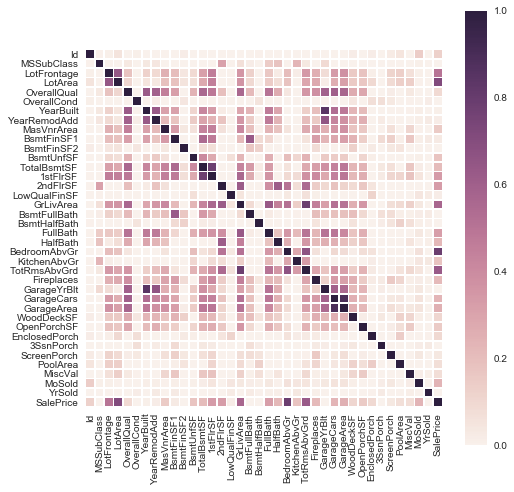

In [1455]:
#Corelationship between SalePrice and Home aspects.
fig, ax = plt.subplots(figsize=(8,8))                       #sample fig size in inches
sns.heatmap(h_data.corr(), vmax=1,vmin=0, linewidths=.5, square=True);

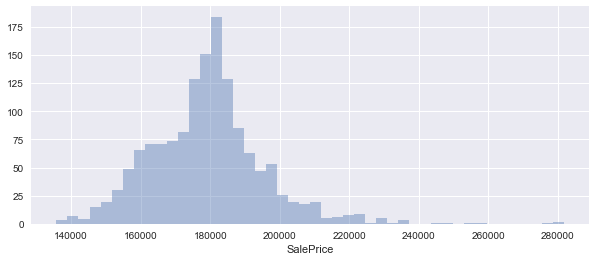

In [1456]:
# Range SalePrice for houses and thier related quanity.
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(h_data['SalePrice'], kde=None);

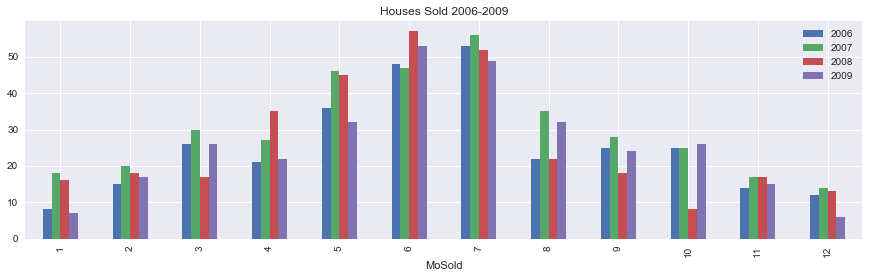

In [1413]:
# NUMBER OF HOUSES SOLD EACH MONTH FOR THE YEAR 2006, 2007, 2008, 2009
h_data1 = h_data[h_data.YrSold == 2006].groupby('MoSold').size()
h_d2006 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2007].groupby('MoSold').size()
h_d2007 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2008].groupby('MoSold').size()
h_d2008 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2009].groupby('MoSold').size()
h_d2009 = h_data1.to_frame()

all_hd = pd.concat([h_d2006, h_d2007, h_d2008, h_d2009], axis=1)
col = ['2006', '2007', '2008', '2009']
all_hd.columns = col
#all_hd.head()
# 2006-2009
all_hd.plot(kind='bar', figsize=(15,4),title='Houses Sold 2006-2009')

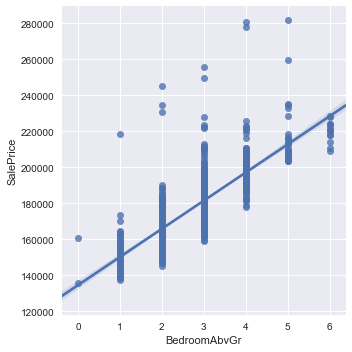

In [1414]:
# relationship between Bedrooms and SalePrice.
sns.lmplot(x="BedroomAbvGr", y="SalePrice", data=h_data)

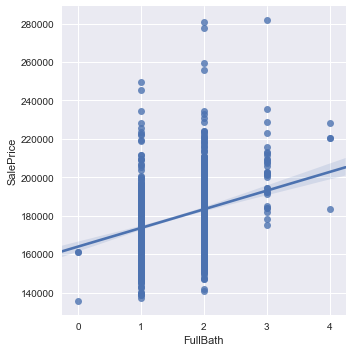

In [1415]:
# relationship between Bathrooms and SalePrice.
sns.lmplot(x="FullBath", y="SalePrice", data=h_data)

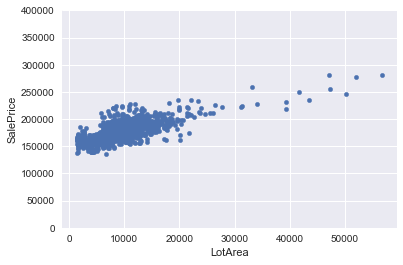

In [1416]:
# relationship between houses lot area footage and price.
sqft_lot_data = pd.concat([h_data['SalePrice'], h_data['LotArea']], axis=1)
sqft_lot_data.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,400000));

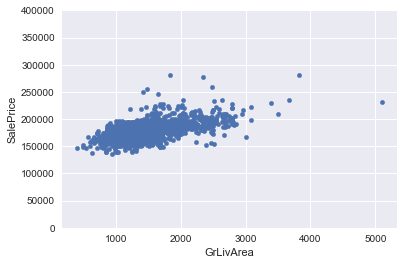

In [1417]:
# relationship between living area square footage and price.
sqft_data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
sqft_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,400000));

In [1418]:
# CHECKING FOR OUTLIERS AND BAD DATA POINTS

In [1474]:
# Filter columns needed.
h_data =  h_data[['BedroomAbvGr', 'FullBath', 'LotArea', 'GrLivArea','YrSold', 'MoSold', 'SalePrice']]
h_data.head()

,BedroomAbvGr,FullBath,LotArea,GrLivArea,YrSold,MoSold,SalePrice
0,2,1,11622,896,2010,6,169277.05
1,3,1,14267,1329,2010,6,187758.39
2,3,2,13830,1629,2010,3,183583.68
3,3,2,9978,1604,2010,6,179317.48
4,2,2,5005,1280,2010,1,150730.08


In [1458]:
# Checking for any NaN value.
h_data.isnull().values.any()

False

In [1473]:
# Key characteristics.
#h_data_smmary = h_data[['BedroomAbvGr', 'FullBath', 'LotArea', 'GrLivArea', 'SalePrice']].describe().round()
#h_data_smmary

In [1460]:
# Viewing potential outliers
potential_outliers = h_data[(h_data.BedroomAbvGr == 0) | (h_data.FullBath == 0)
               |(h_data.YrSold == 0)|(h_data.MoSold == 0)
               |(h_data.GrLivArea >= 4000)|(h_data.SalePrice >= 250000)]
potential_outliers

,Id,BedroomAbvGr,FullBath,LotArea,GrLivArea,YrSold,MoSold,SalePrice
399,1860,2,0,7040,1229,2009,6,161157.18
487,1948,3,2,47280,1488,2008,7,255629.49
728,2189,5,3,47007,3820,2008,7,281643.98
790,2251,4,2,56600,1836,2008,1,280618.13
803,2264,4,2,51974,2338,2007,6,277936.13
1053,2514,0,0,20064,1743,2007,5,160927.61
1089,2550,2,2,39290,5095,2007,10,230841.34
1140,2601,0,0,6710,936,2007,6,135751.32
1336,2797,5,2,33120,2486,2006,10,259423.86


In [1477]:
# Filtering non-needed values!
hs_data = h_data[(h_data.YrSold >= 2006) & (h_data.YrSold <= 2009)&
                (h_data.BedroomAbvGr != 0) & (h_data.FullBath != 0)
                & (h_data.GrLivArea <= 4000)]

# ranaming columns
col = ['Bedrooms', 'Bathrooms','LotArea_SqFt', 'LivArea_SqFt', 'year', 'month', 'SalePrice']
hs_data.columns = col
hs_data.head(3)

,Bedrooms,Bathrooms,LotArea_SqFt,LivArea_SqFt,year,month,SalePrice
164,2,1,13008,882,2009,10,177322.00
165,4,2,10200,1434,2009,6,193927.94
166,3,2,10179,1608,2009,7,181715.62


In [1462]:
# HOUSING DATA AVERAGE SALESPRICES FOR EACH MONTH OF EACH YEAR.----------------------------------------------------------------

In [1490]:
# Building dataframe to a series datetime index
hs_data.loc[:, 'day'] = 1

# adding column as one datetime.
date = pd.to_datetime(hs_data[['year', 'month', 'day']])
hs_data.loc[:, 'Date'] = date

# Subtracting only columns needed!
housing_data = hs_data[['Date', 'Bedrooms', 'Bathrooms', 'LotArea_SqFt', 'LivArea_SqFt', 'SalePrice']]

#Formating 'Id' value to only year and month.
housing_data.loc[:, 'Date'] = housing_data.Date.dt.to_period('M')

# Seting, sorting and renaming index
housing_data = housing_data.set_index('Date').sort_index()

housing_data.head(2)

,Bedrooms,Bathrooms,LotArea_SqFt,LivArea_SqFt,SalePrice
Date,,,,,
2006-01,4,2,13128,2064,196858.92
2006-01,3,1,13052,1024,183433.47


In [1499]:
# AVERAGE VALUES FOR EACH COLUMN
hs_data_avg = housing_data.groupby(housing_data.index).mean().round()

# changing index to string object for later joining
hs_data_avg.index = hs_data_avg.index.map(str)
hs_data_avg.head()

,Bedrooms,Bathrooms,LotArea_SqFt,LivArea_SqFt,SalePrice
Date,,,,,
2006-01,3.0,2.0,11826.0,1690.0,181021.0
2006-02,3.0,2.0,9411.0,1549.0,174718.0
2006-03,3.0,1.0,10683.0,1377.0,177407.0
2006-04,3.0,1.0,7923.0,1271.0,170332.0
2006-05,3.0,2.0,9487.0,1545.0,180469.0


In [ ]:
# WEATHER DATA -------------------------------------------------------------------------------------------------------------

In [1468]:
weather_d = pd.DataFrame.from_csv('WeatherData/weather.csv', index_col=None)
weather_d.head(1)

,STATION,STATION_NAME,DATE,MXPN,MNPN,EVAP,MDEV,DAEV,SX52,SX53,SX51,SN52,SN53,SN51,MDPR,DAPR,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,TOBS,WESD,WESF,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WDMV,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070825,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.09,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [1493]:
# Sorting to data needed
weather_d1 = weather_d[weather_d.STATION_NAME == 'AMES 8 WSW IA US']
weather_d2 = weather_d1[(weather_d1.DATE >= 20060101) & (weather_d1.DATE <= 20091231)]
weather_d3 = weather_d2[['DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]

# Getting date to datetime, setting and sortinging index to ('Date')
weather_d3.loc[:, 'Date'] = pd.to_datetime(weather_d3.DATE, format='%Y%m%d')
weather_d4 = weather_d3[['Date', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]
#print(weather_d4)
weather_d4['Date'] =weather_d4.Date.dt.to_period('M')
weather_data = weather_d4.set_index('Date').sort_index()

wth_data_avg.head()

,Avg_Prcp,Avg_Snow,Avg_Tmax,Avg_Tmin
Date,,,,
2006-01,0.02,0.06,41.42,25.84
2006-02,-357.09,0.07,40.61,14.46
2006-03,-322.46,-322.32,47.26,27.90
2006-04,0.14,0.00,67.97,43.03
2006-05,0.07,0.00,74.48,51.23


In [1501]:
# WEATHER AVERAGES FOR EACH MONTH OF EACH YEAR.

col = ['Avg_Prcp', 'Avg_Snow', 'Avg_Tmax', 'Avg_Tmin']
wth_data_avg.columns = col

wth_data_avg = weather_data.groupby(weather_data.index).mean()

wth_data_avg.index = wth_data_avg.index.map(str)
wth_data_avg.head(2)

,PRCP,SNOW,TMAX,TMIN
Date,,,,
2006-01,0.02,0.06,41.42,25.84
2006-02,-357.09,0.07,40.61,14.46


In [ ]:
# MERGING HOUSING AND WEATHER DATA --------------------------------------------------------------------------------------------

In [1503]:
hs_wth_data = hs_data_avg.join(wth_data_avg)
hs_wth_data.head()

,Bedrooms,Bathrooms,LotArea_SqFt,LivArea_SqFt,SalePrice,PRCP,SNOW,TMAX,TMIN
Date,,,,,,,,,
2006-01,3.0,2.0,11826.0,1690.0,181021.0,0.02,0.06,41.42,25.84
2006-02,3.0,2.0,9411.0,1549.0,174718.0,-357.09,0.07,40.61,14.46
2006-03,3.0,1.0,10683.0,1377.0,177407.0,-322.46,-322.32,47.26,27.90
2006-04,3.0,1.0,7923.0,1271.0,170332.0,0.14,0.00,67.97,43.03
2006-05,3.0,2.0,9487.0,1545.0,180469.0,0.07,0.00,74.48,51.23
